## By: Harsh Gupta

### Prediction using Unsupervised ML

### Objective: 
### Predict the optimum number of clusters and represent it visually using K-Means Clustering.

### Task 2

### TSF  GRIP JUNE21

Dataset URL:"https://bit.ly/3kXTdox"

#### Importing Required Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#### Exploring and Understanding data

In [67]:
iris_df = pd.read_csv("Iris.csv") #Loading dataset
print("The dataset is Imported.")

The dataset is Imported.


In [68]:
iris_df.head() #displaying first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
iris_df.shape #shape of data

(150, 6)

We have 150 rows and 6 columns.

In [70]:
iris_df.describe() #description of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
iris_df.info() #to get the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [72]:
iris_df.isnull().sum() #checking null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

*We do not have missing values in this dataset.*

*Now, we will drop two columns which are Id and Species from our dataset*

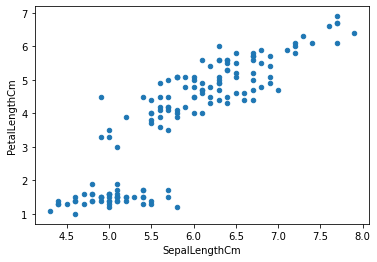

In [73]:
iris_df.plot(kind = 'scatter', x = "SepalLengthCm", y = "PetalLengthCm" )
plt.show()

Here we can see the normal plot between petal_length and sepal_length without knowing the optimal number of clusters

In [74]:
iris_df.drop(columns=["Id","Species"],axis=1,inplace=True) # because we don't use these two columns

In [75]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
#scaling the dataset
mms = MinMaxScaler()
mms.fit(iris_df)
iris_df_transformed = mms.transform(iris_df)

In [77]:
iris_df_transformed

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [78]:
#Convert to dataframe
iris_df_transformed = pd.DataFrame(iris_df_transformed,columns =['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm'])

In [79]:
iris_df_transformed

,SepalLengthCm,PetalLengthCm,SepalWidthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


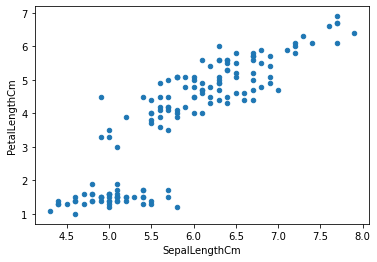

In [80]:
iris_df.plot(kind = 'scatter', x = "SepalLengthCm", y = "PetalLengthCm" )
plt.show()

Elbow Method runs K-Means clustering on dataset on number of values for k and then for each values of k computes an average scores for all clusters.

In [81]:
wcss=[] # List for saving the values of Within-Cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(iris_df) #To train the model and create classifier
    wcss.append(kmeans.inertia_) # To obtain the within cluster sum of square


C:\Users\rites\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608,
 26.04820224804435]

Text(0.5, 1.0, 'Elbow Method for finding optimal number of clusters')

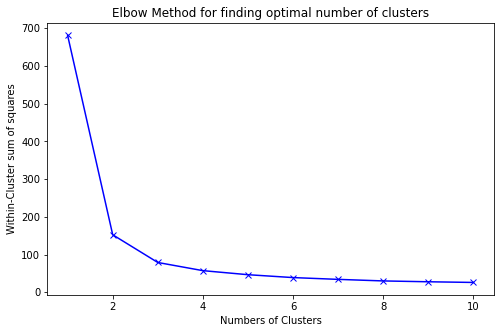

In [83]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,'bx-')
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within-Cluster sum of squares")
plt.title("Elbow Method for finding optimal number of clusters")

In the above plot above the elbow is at '3' indicating that the optimum k for the dataset is 3.

From this we choose the number of clusters as '**3**'.

In [84]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(iris_df) # Here we are training, creating Classifier and predicting the Model

In [85]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Here, 0,1 and 2 are the labels of species that are setosa, versicolor and virginica

In [86]:
kmeans.cluster_centers_ # Centroids of the clusters formed

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### Visualisation of Clusters

Text(0.5, 1.0, 'K-Means Clustering')

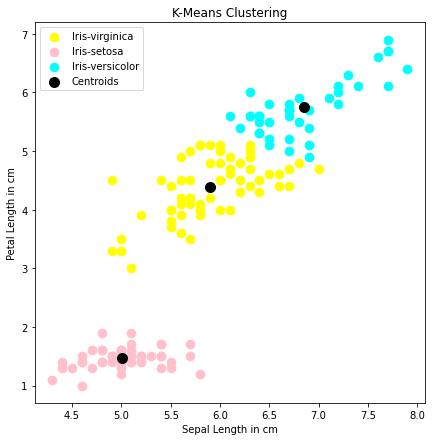

In [87]:
plt.figure(figsize=(7,7))
plt.scatter(iris_df.iloc[y_kmeans==0,0],iris_df.iloc[y_kmeans==0,2],s=75,c='yellow',label='Iris-virginica')
plt.scatter(iris_df.iloc[y_kmeans==1,0],iris_df.iloc[y_kmeans==1,2],s=75,c='pink',label='Iris-setosa')
plt.scatter(iris_df.iloc[y_kmeans==2,0],iris_df.iloc[y_kmeans==2,2],s=75,c='cyan',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('K-Means Clustering')

### Thus Optimum number of cluster is 3